seyyed abolfazl rahimi                           97105941

regression

# life expectancy


In [ ]:
install.packages("corrplot")
install.packages("tidyverse")
install.packages("glmnet")
install.packages("pls")
install.packages("MASS")
install.packages("reshape")
install.packages("caret")
set.seed(1)

In [ ]:
install.packages("dplyr")

In [484]:
library(ggplot2)
library(dplyr)
library(tidyverse)
library(glmnet)
library(pls)
library(corrplot)
library(caret)

# Regression



**Acknowledgements**

I got this data from another kaggler KumarRajarshi. Due to some anamolies, I was forced to upload this.
Originally, the data was collected from WHO and United Nations website with the help of Deeksha Russell and Duan Wang.

**Context**

Although there have been lot of studies undertaken in the past on factors affecting life expectancy considering demographic variables, income composition and mortality rates. It was found that affect of immunization and human development index was not taken into account in the past. Also, some of the past research was done considering multiple linear regression based on data set of one year for all the countries. Hence, this gives motivation to resolve both the factors stated previously by formulating a regression model based on mixed effects model and multiple linear regression while considering data from a period of 2000 to 2015 for all the countries. Important immunization like Hepatitis B, Polio and Diphtheria will also be considered. In a nutshell, this study will focus on **immunization factors, mortality factors, economic factors, social factors and other health related factors as well**. Since the observations this dataset are based on different countries, it will be easier for a country to determine the predicting factor which is contributing to lower value of life expectancy. This will help in suggesting a country which area should be given importance in order to efficiently improve the life expectancy of its population.

**Content**

The project relies on accuracy of data. The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The data-sets are made available to public for the purpose of health data analysis. The data-set related to life expectancy, health factors **for 193 countries has been collected from the same WHO data repository website** and its corresponding **economic data was collected from United Nation website.** Among all categories of health-related factors only those critical factors were chosen which are more representative. **It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years.** Therefore, in this project we have considered *data from year 2000-2015 for 193 countries for further analysis.* The individual data files have been merged together into a single data-set. On initial visual inspection of the data showed some missing values. As the data-sets were from WHO, we found no evident errors. Missing data was handled in R software by using Missmap command. The result indicated that most of the **missing data was for population, Hepatitis B and GDP.** The missing data were from less known countries like Vanuatu, Tonga, Togo, Cabo Verde etc. Finding all data for these countries was difficult and hence, it was decided that we exclude these countries from the final model data-set. The final merged file(final dataset) consists of 22 Columns and 2938 rows which meant 20 predicting variables. **All predicting variables was then divided into several broad categories:​Immunization related factors, Mortality factors, Economical factors and Social factors.**

**Inspiration**

The data-set aims to answer the following key questions:

 1. Does various predicting factors which has been chosen initially really affect the Life expectancy? What are the predicting variables actually affecting the life expectancy?
 
 2. Should a country having a lower life expectancy value(less than 65) increase its healthcare expenditure in order to improve its average lifespan? 
  
 3. How does Infant and Adult mortality rates affect life expectancy?

 4. Does Life Expectancy has positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc. 
 
 5. What is the impact of schooling on the lifespan of humans? 
 
 6. Does Life Expectancy have positive or negative relationship with drinking alcohol?
 
 7. Do densely populated countries tend to have lower life expectancy? 
  
 8. What is the impact of Immunization coverage on life Expectancy?




First, let's take a look at the data:

 [1] "Country"                         "Year"                           
 [3] "Status"                          "Life.expectancy"                
 [5] "Adult.Mortality"                 "infant.deaths"                  
 [7] "Alcohol"                         "percentage.expenditure"         
 [9] "Hepatitis.B"                     "Measles"                        
[11] "BMI"                             "under.five.deaths"              
[13] "Polio"                           "Total.expenditure"              
[15] "Diphtheria"                      "HIV.AIDS"                       
[17] "GDP"                             "Population"                     
[19] "thinness..1.19.years"            "thinness.5.9.years"             
[21] "Income.composition.of.resources" "Schooling"                      
[1] 2938


                Country          Year             Status     Life.expectancy
 Afghanistan        :  16   Min.   :2000   Developed : 512   Min.   :36.30  
 Albania            :  16   1st Qu.:2004   Developing:2426   1st Qu.:63.10  
 Algeria            :  16   Median :2008                     Median :72.10  
 Angola             :  16   Mean   :2008                     Mean   :69.22  
 Antigua and Barbuda:  16   3rd Qu.:2012                     3rd Qu.:75.70  
 Argentina          :  16   Max.   :2015                     Max.   :89.00  
 (Other)            :2842                                    NA's   :10     
 Adult.Mortality infant.deaths       Alcohol        percentage.expenditure
 Min.   :  1.0   Min.   :   0.0   Min.   : 0.0100   Min.   :    0.000     
 1st Qu.: 74.0   1st Qu.:   0.0   1st Qu.: 0.8775   1st Qu.:    4.685     
 Median :144.0   Median :   3.0   Median : 3.7550   Median :   64.913     
 Mean   :164.8   Mean   :  30.3   Mean   : 4.6029   Mean   :  738.251     
 3rd Qu.:

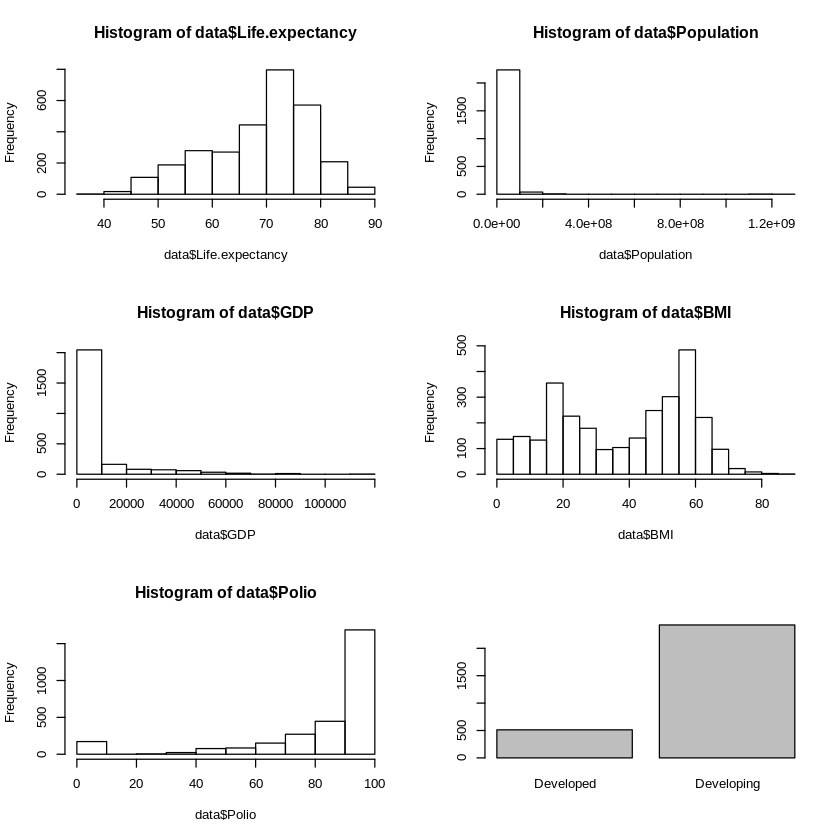

In [485]:
data = read.csv("/content/life_exp.csv")
print(colnames(data))
print(nrow(data))
par(mfrow=c(3, 2))
hist(data$Life.expectancy)
hist(data$Population)
hist(data$GDP)
hist(data$BMI)
hist(data$Polio)
plot(data$Status)
(summary(data))

As mentioned in the introduction, there are NaNs in this dataset, so first of all I tried to delete them from my data set. As below code shows, most NaNs were found in Population and Hepatits.B one is a social factor and another is an immunization. 


before deleting these items, first I tried to see whether they were correlated to any other datas or not. After observing that they can't be modeled with other factors, I decided to keep them as very strong factors.

So I deleted the na.rows!

[1] 2938
[1] 1649


        Country          Year                 Status     Life.expectancy
 Afghanistan:  16   Min.   :-1.91807   Developed : 242   Min.   :44.0   
 Albania    :  16   1st Qu.:-0.69489   Developing:1407   1st Qu.:64.4   
 Armenia    :  15   Median : 0.03902                     Median :71.7   
 Austria    :  15   Mean   : 0.00000                     Mean   :69.3   
 Belarus    :  15   3rd Qu.: 0.77292                     3rd Qu.:75.0   
 Belgium    :  15   Max.   : 1.75147                     Max.   :89.0   
 (Other)    :1557                                                       
 Adult.Mortality   infant.deaths         Alcohol        percentage.expenditure
 Min.   :-1.3344   Min.   :-0.26937   Min.   :-1.1226   Min.   :-0.3973       
 1st Qu.:-0.7279   1st Qu.:-0.26110   1st Qu.:-0.9241   1st Qu.:-0.3760       
 Median :-0.1613   Median :-0.24455   Median :-0.1845   Median :-0.3148       
 Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.0000       
 3rd Qu.: 0.4691   3r

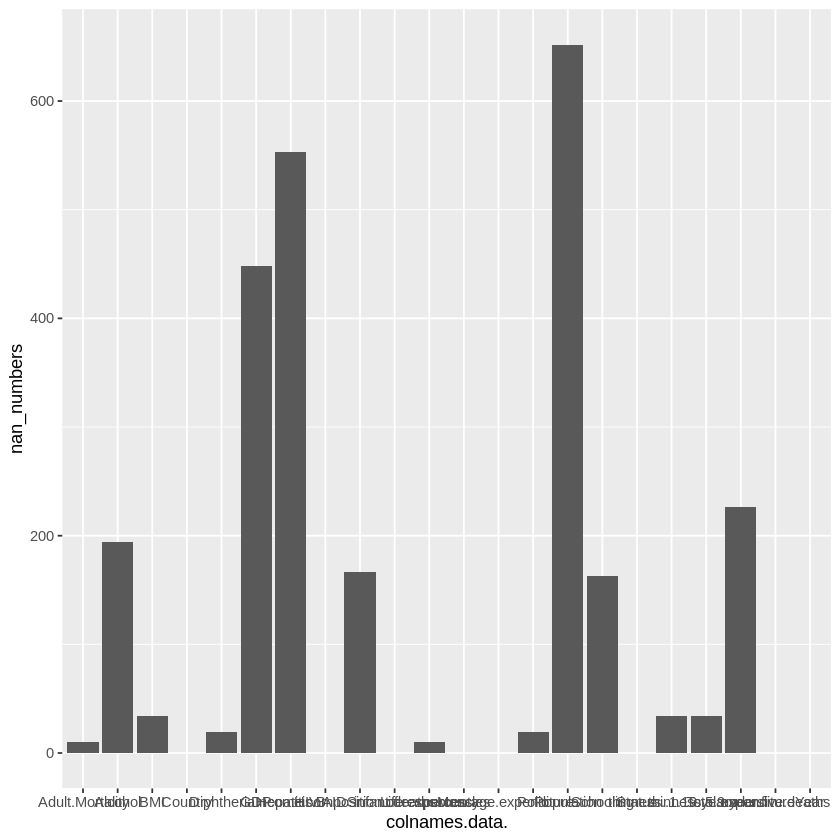

In [486]:
data = read.csv("/content/life_exp.csv")
nan_numbers <- c()
# summary(data)
for (i in (1:22)){
  nan_numbers <- c(nan_numbers, sum(is.na(data[, i])))
}
nan_df <- data.frame(colnames(data), nan_numbers)
ggplot(nan_df, aes(colnames.data., nan_numbers)) + geom_bar(stat="identity")
# data <- select(data, -c(Population, Hepatitis.B))
print(nrow(data))
data<- na.omit(data)
preproc1 <- preProcess(data[,c(2,5:22)], method=c("center", "scale"))
data <- predict(preproc1, data[,c(1:22)])
print(nrow(data))
summary(data)

As shown, model length shrinked to 1649 rows instead of 1649.


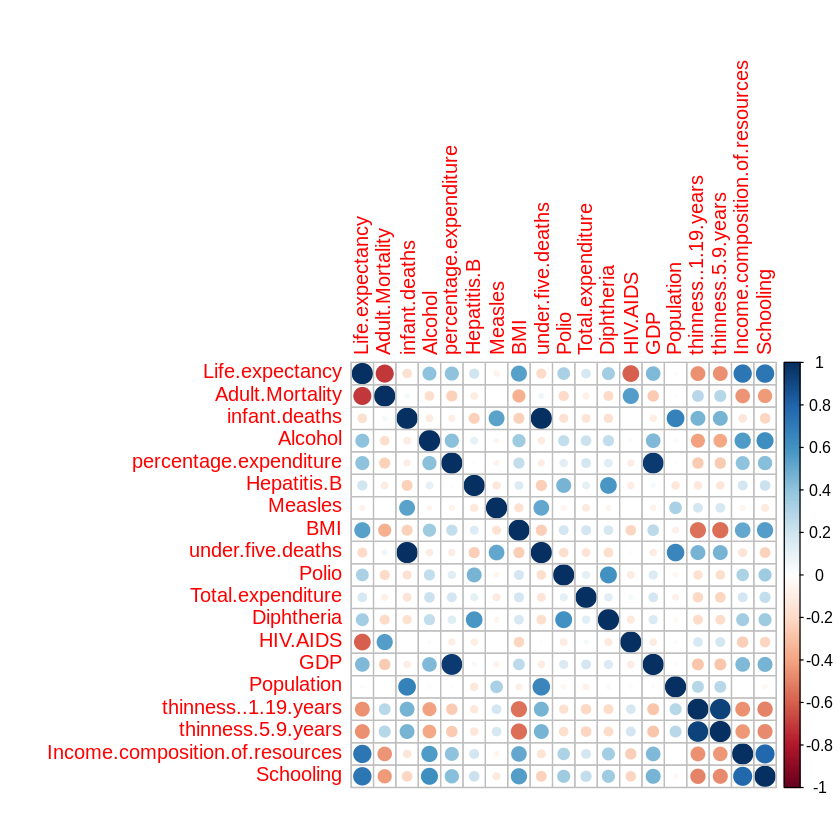
<div dir=rtl>
همانطور که دیده میشود بریا کورریلیشن ماتریس کوریلیشن را رسم کردیم که با استفاده از آن میتوان ستون های مناسب را انتخاب کرد.
</div>

1. There is a very high correlation between under.five.deaths and infant.daeaths. This could be predicted, cuase one can say, there is a very high relationhip between death rate of under five years old children death and infant.deaths.
So it's better to keep just one of them. And it's very good to keep in mind that both of these are health factors.

There are two other high correlated columns. Let's take a look at them too.

 2. GDP and percentage.expenditure:
 Again both of them are economic factors. As shown below, they don't have very different beahvior, so as GDP is more known in public I preferred to keep that.

 3. thinness..1.19.years and thinness.5.9.years
 As their name suggest these to factors again are very close. So I kept thinness.5.9 years
 


before deleting these items, It's good to see how highly they're correlated!

Warning message:
“Use of `data$Population` is discouraged. Use `Population` instead.”
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

Warning message:
“Computation failed in `stat_smooth()`:
x has insufficient unique values to support 10 knots: reduce k.”
Warning message:
“Use of `data$Population` is discouraged. Use `Population` instead.”
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



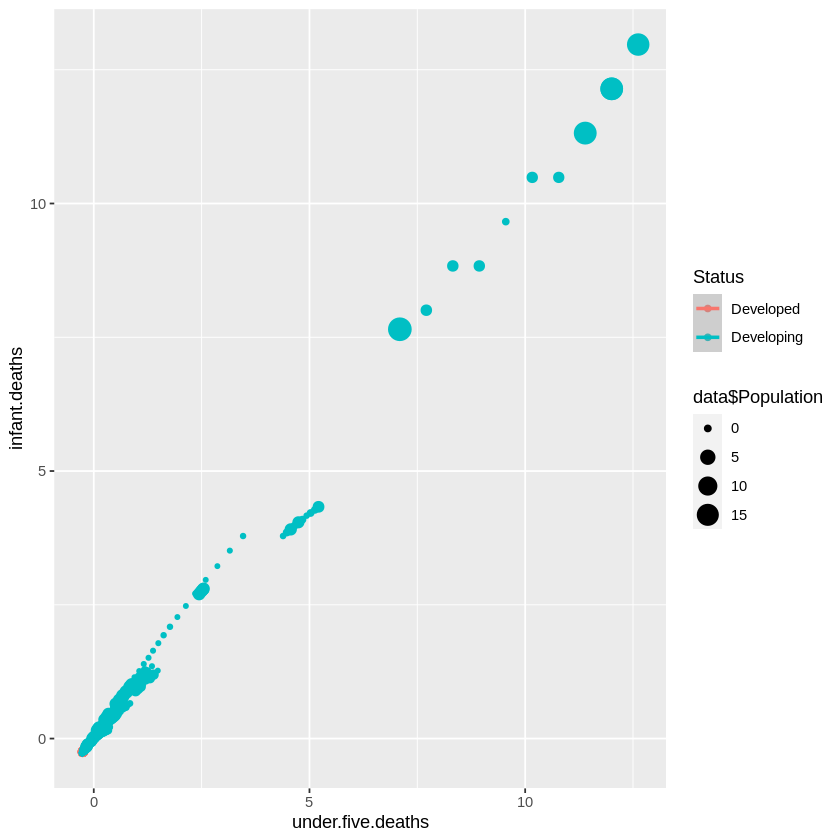

Warning message:
“Use of `data$Population` is discouraged. Use `Population` instead.”
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



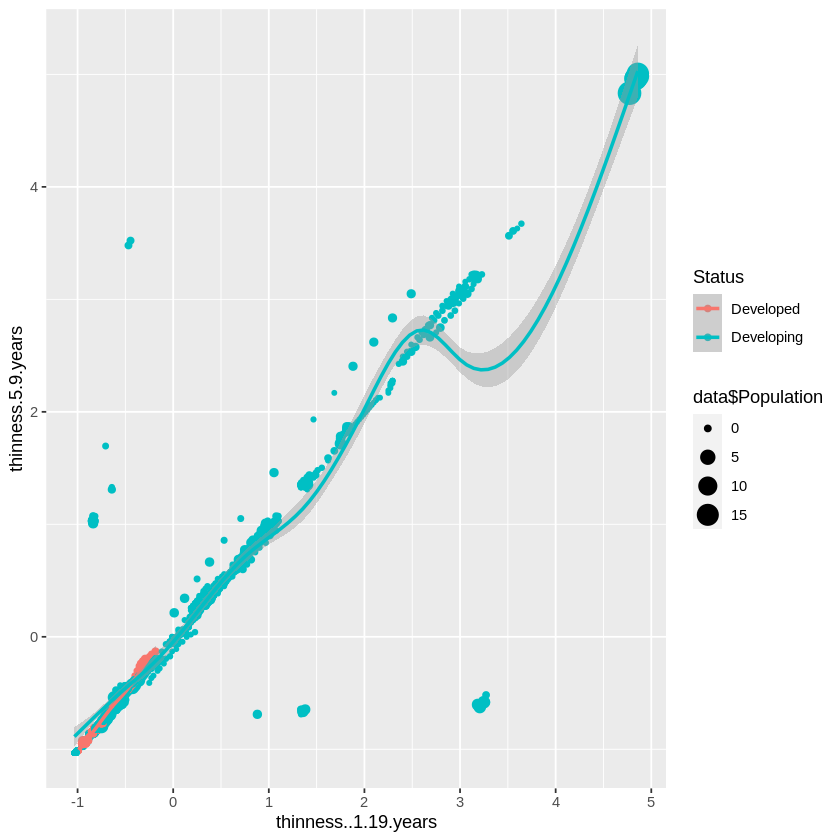

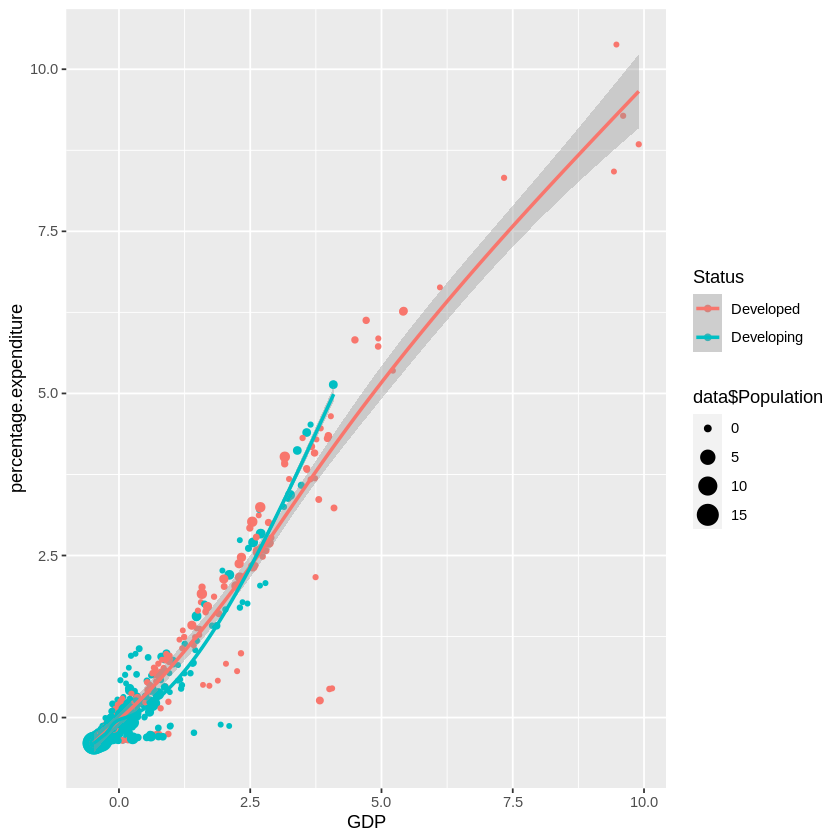

In [487]:
ggplot(data, aes(under.five.deaths, infant.deaths, col=Status)) + geom_point(aes(size=data$Population)) + geom_smooth()
ggplot(data, aes(thinness..1.19.years, thinness.5.9.years, col=Status)) + geom_point(aes(size=data$Population)) + geom_smooth()
ggplot(data, aes(GDP, percentage.expenditure, col=Status)) + geom_point(aes(size=data$Population)) + geom_smooth()

In [488]:
data <- select(data, -c(thinness..1.19.years, percentage.expenditure, under.five.deaths, Country))
print(ncol(data))

ERROR: ignored

before continuing I'd preffer to give you more information about data.
below I tried to plot some features in my dataset.

In [489]:
library(reshape)
data.fewer.cols <- select(data, c(GDP, Population, Schooling, Hepatitis.B, Adult.Mortality, Status, Life.expectancy))


ggplot((data.fewer.cols), aes(Adult.Mortality, Life.expectancy, col=Status)) + geom_jitter(aes(size=(Population))) + geom_smooth(aes(color="1"))
ggplot((data.fewer.cols), aes(Schooling, GDP, col=Status)) + geom_jitter(aes(size=(Population))) + geom_smooth(aes(color="1"))
ggplot((data.fewer.cols), aes(Hepatitis.B, Life.expectancy, col=Status)) + geom_jitter(aes(size=(Population))) + geom_smooth(aes(color="1"))

ERROR: ignored

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



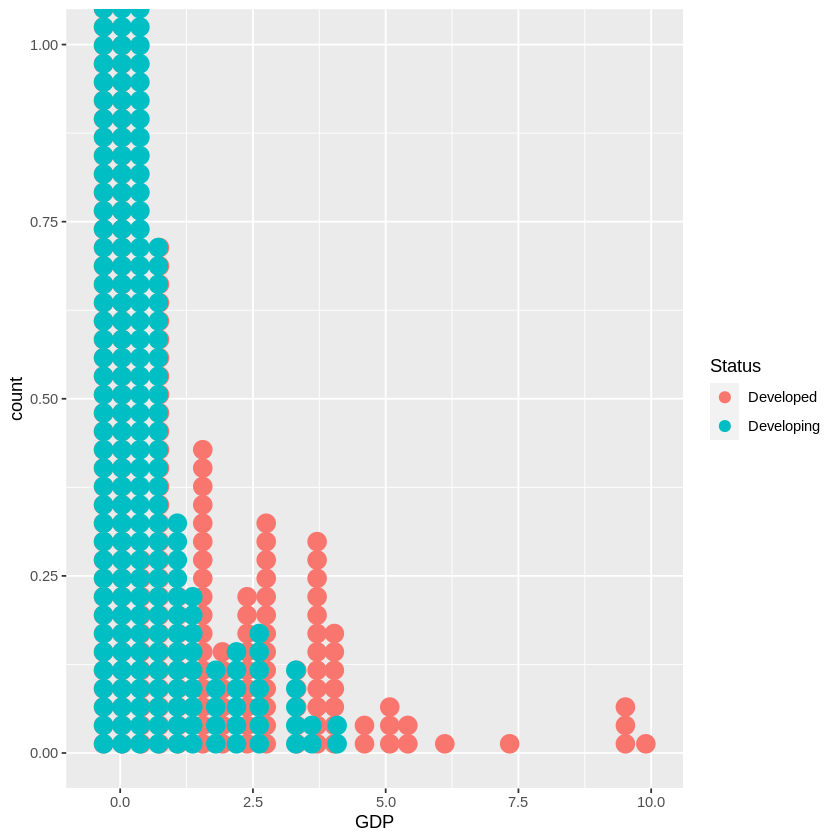

In [490]:
ggplot(data.fewer.cols, aes(GDP, col=Status)) + geom_dotplot(aes(fill=Status))

I tried to remove outliers.

To do this, I first detect points with high leverage and large residurals.
threshhold values were found on the internet!(82 outliers...)

In [492]:
reg.detector <- lm(Life.expectancy~., data)
HighLeverage <- abs(cooks.distance(reg.detector)) > (4/nrow(data))
LargeResiduals <- abs(rstudent(reg.detector)) > 3
print(nrow(data))
data <- data[!HighLeverage & !LargeResiduals,]
print(nrow(data))
print(ncol(data))
data <- select(data, -c(thinness..1.19.years, percentage.expenditure, under.five.deaths, Country))

[1] 1535
[1] 1430
[1] 22


ERROR: ignored

and also by PCR I decided to keep all data columns!

In [493]:
pcr.fit = pcr(Life.expectancy~., data=data, scale=TRUE, validtaion="CV")
summary(pcr.fit)
validationplot(pcr.fit, val.type = "MSEP")

Warning message in pls::mvr(Life.expectancy ~ ., data = data, scale = TRUE, validtaion = "CV", :
“Scaling with (near) zero standard deviation”


ERROR: ignored

# انتخاب مدل

First train and test!

In [ ]:
index <- sample(1:nrow(data), size = trunc(.8 * nrow(data)))
r.train <- data %>%
  filter(row_number() %in% index)
r.test <- data %>%
  filter(!row_number() %in% index)

# SIMPLE REGRESSION


Call:
lm(formula = Life.expectancy ~ ., data = r.train)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.1680 -1.6190 -0.0669  1.7570 10.9923 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     69.04087    0.24902 277.250  < 2e-16 ***
Year                            -0.28334    0.07895  -3.589 0.000346 ***
StatusDeveloping                -0.05695    0.27739  -0.205 0.837368    
Adult.Mortality                 -2.57321    0.11633 -22.119  < 2e-16 ***
infant.deaths                   -0.27902    0.15142  -1.843 0.065644 .  
Alcohol                         -0.49493    0.11436  -4.328 1.64e-05 ***
Hepatitis.B                      0.02146    0.09926   0.216 0.828871    
Measles                          0.18613    0.13557   1.373 0.170022    
BMI                              0.15672    0.10332   1.517 0.129580    
Polio                           -0.05556    0.10351  -0.537 0.591541    
Total.expenditure              

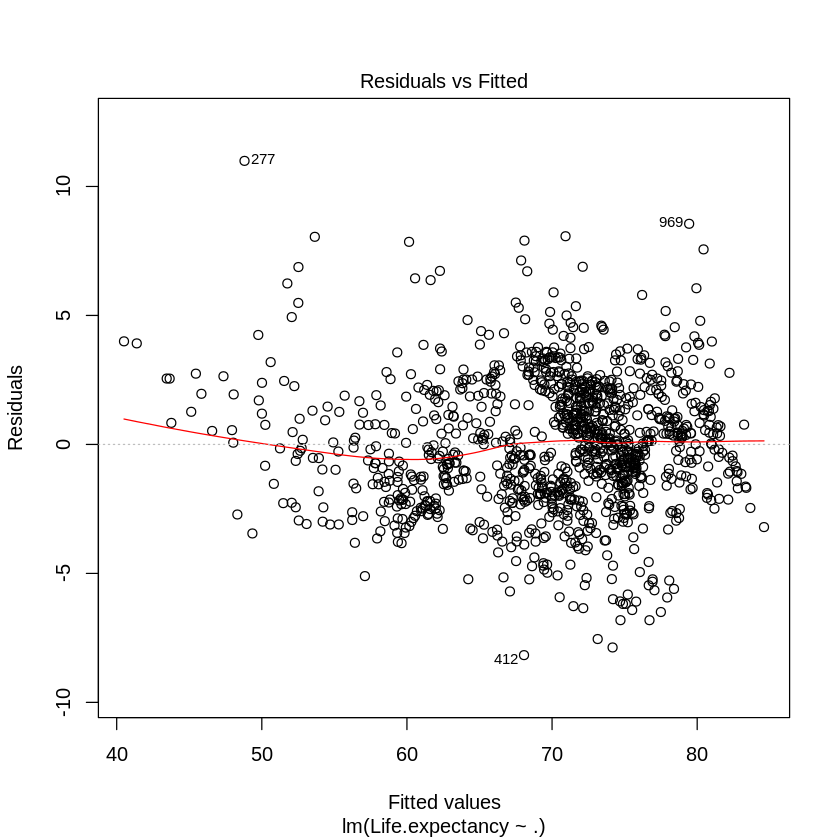

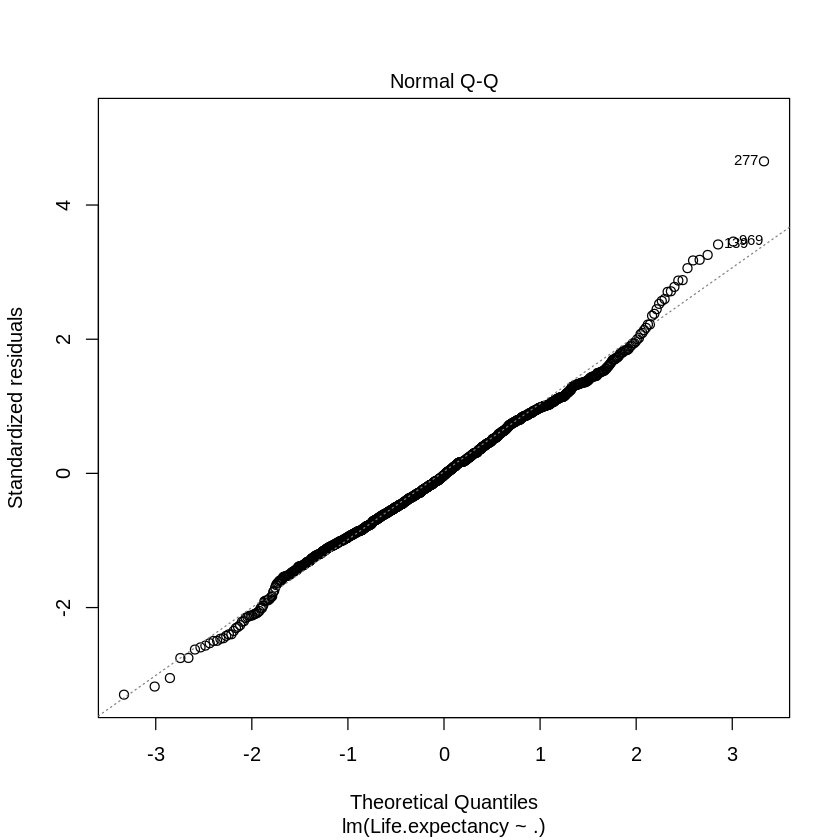

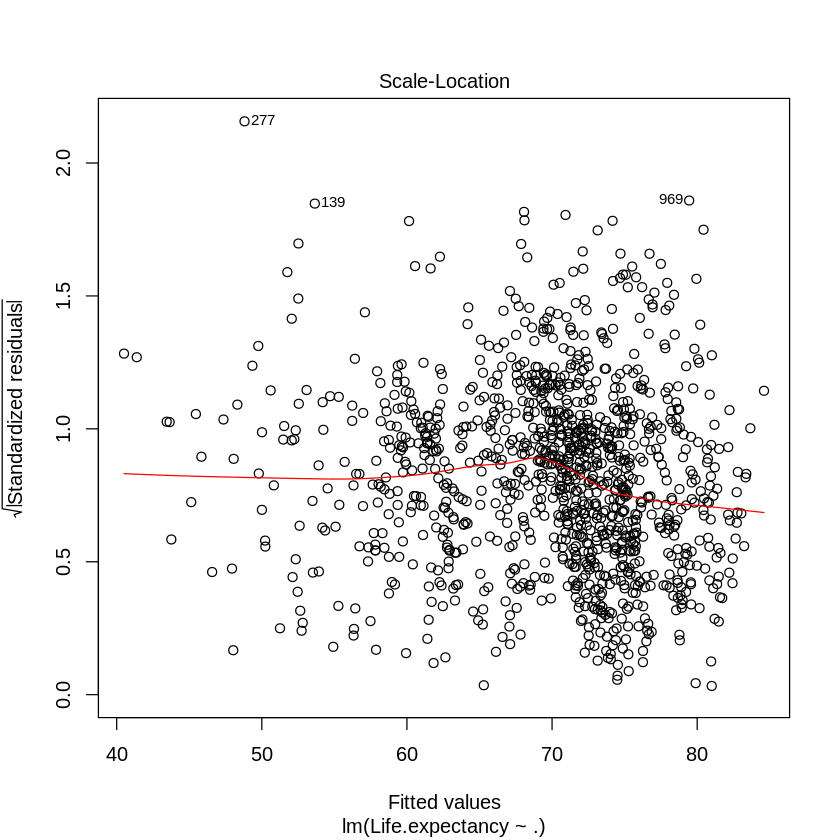

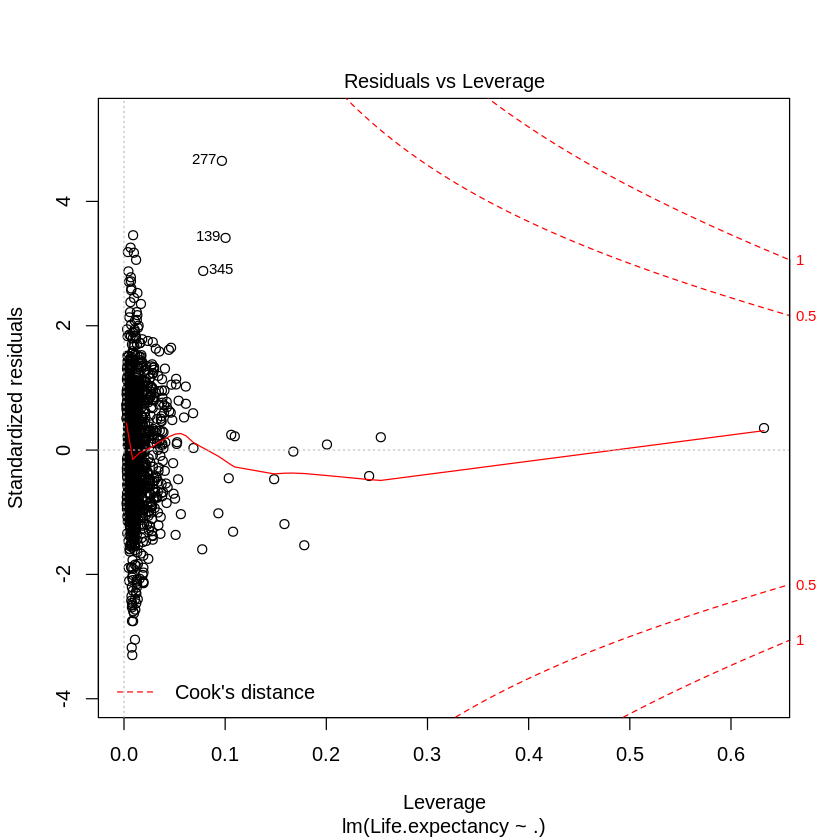

In [ ]:
lm.fit = lm(Life.expectancy~., data= r.train)
summary(lm.fit)
plot(lm.fit)

In [ ]:
lm.pred = predict(lm.fit, r.test)
mean((lm.pred - r.test$Life.expectancy)^2)

[1] 6.908393

this model actually did well!

but there are some issues I wanna discuss.

 1. For interpreting to be easier I standardized all columns except Life expectancy. So that error is meaningful. 
 2. for each country the life expectancy during 17 years is actually a time series. so knowing the amount of life expectancy in year 2008 would lead to a very good assumption of its rate in 2009. in order to fix this, I deleted countries from the model.

# **RIDGE**

          Length Class     Mode   
a0         100   -none-    numeric
beta      1700   dgCMatrix S4     
df         100   -none-    numeric
dim          2   -none-    numeric
lambda     100   -none-    numeric
dev.ratio  100   -none-    numeric
nulldev      1   -none-    numeric
npasses      1   -none-    numeric
jerr         1   -none-    numeric
offset       1   -none-    logical
call         5   -none-    call   
nobs         1   -none-    numeric

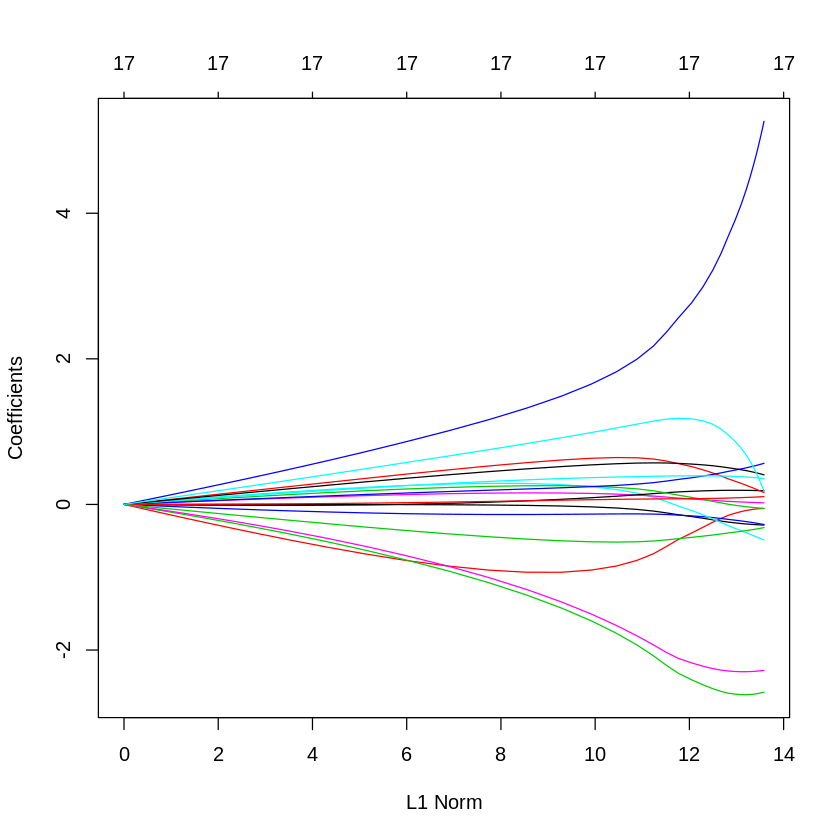

In [ ]:
grid = 10^seq(10, -2, length=100)
y <- r.train$Life.expectancy
x <- model.matrix(Life.expectancy~., r.train)[, -1]
y_t <- r.test$Life.expectancy
x_t <- model.matrix(Life.expectancy~., r.test)[, -1]
ridge.mod = glmnet(x, y, alpha=0, lambda=grid)
plot(ridge.mod)
summary(ridge.mod)

[1] 0.6653844

[1] 7.063841

i,j,x
<int>,<int>,<dbl>
1,1,69.288967121
2,1,-0.241542559
3,1,-0.149423537
4,1,-2.593711155
5,1,-0.206477953
6,1,-0.286115786
7,1,0.042118681
8,1,0.194048932
9,1,0.356712294


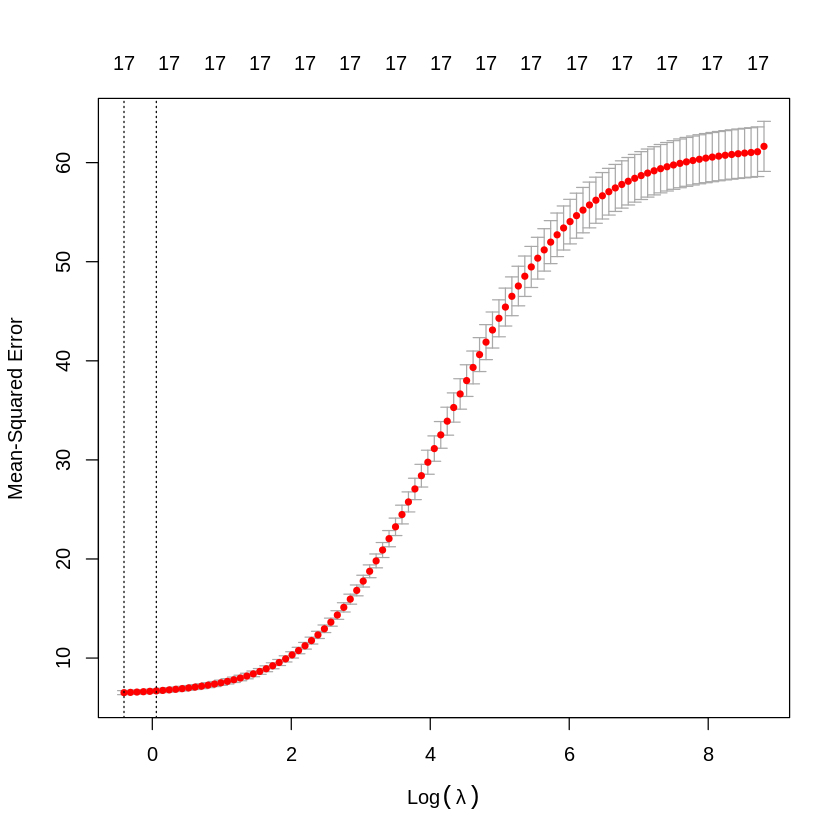

In [ ]:
cv.out = cv.glmnet(x, y, alpha=0)
plot(cv.out)
best_lambdap = cv.out$lambda.min
best_lambdap
ridge.pred = predict(ridge.mod, s=best_lambdap, newx = x_t)
mean((ridge.pred - y_t)^2)
summary(coef(glmnet(x, y, alpha=0, lambda=best_lambdap)))

# **LASSO**

Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”


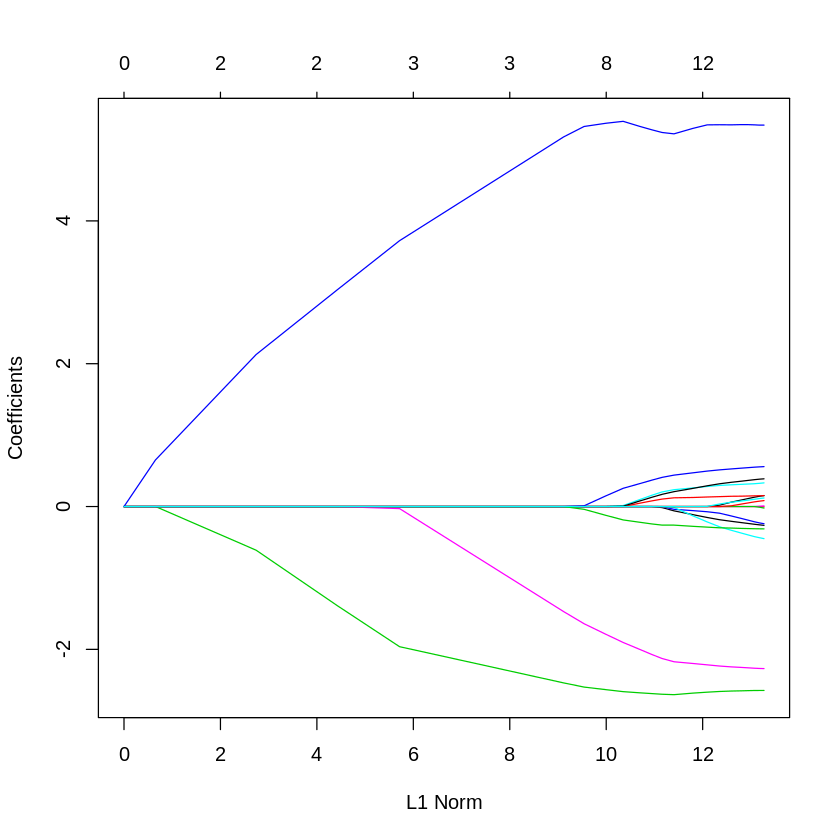

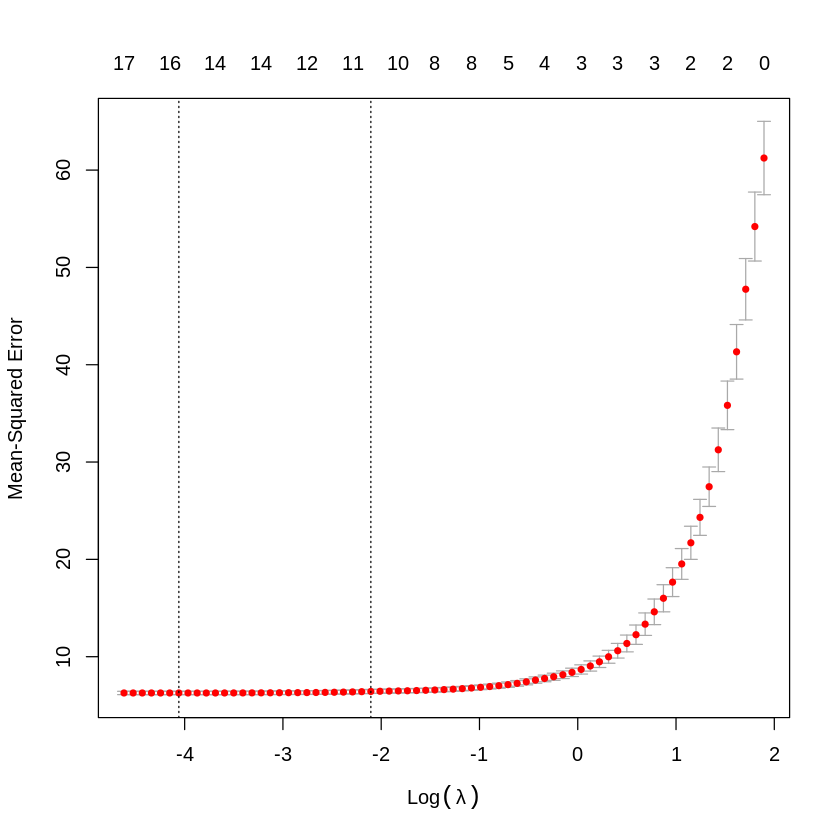

In [ ]:
grid = 10^seq(10, -2, length=100)
y <- r.train$Life.expectancy
x <- model.matrix(Life.expectancy~., r.train)[, -1]
y_t <- r.test$Life.expectancy
x_t<- model.matrix(Life.expectancy~., r.test)[, -1]
lasso.mod = glmnet(x, y, alpha=1, lambda=grid)
plot(lasso.mod)
cv.out = cv.glmnet(x, y, alpha=1)
plot(cv.out)
best_lambda = cv.out$lambda.min

In [ ]:
best_lambda
lasso.pred = predict(lasso.mod, s=best_lambda, newx = x_t)
mean((lasso.pred - y_t)^2)

[1] 0.01726689

[1] 6.92535

# **PCR**

Data: 	X dimension: 1153 17 
	Y dimension: 1153 1
Fit method: svdpc
Number of components considered: 17
TRAINING: % variance explained
                 1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps
X                  29.47    41.17    51.33    59.59    66.06    71.43    76.31
Life.expectancy    66.46    72.66    72.79    85.80    85.92    86.00    86.66
                 8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
X                  80.01    83.47     86.68     89.49     92.01     94.16
Life.expectancy    86.66    87.39     87.63     87.75     88.53     88.92
                 14 comps  15 comps  16 comps  17 comps
X                   96.14     98.02     99.58    100.00
Life.expectancy     88.99     89.01     89.18     90.11


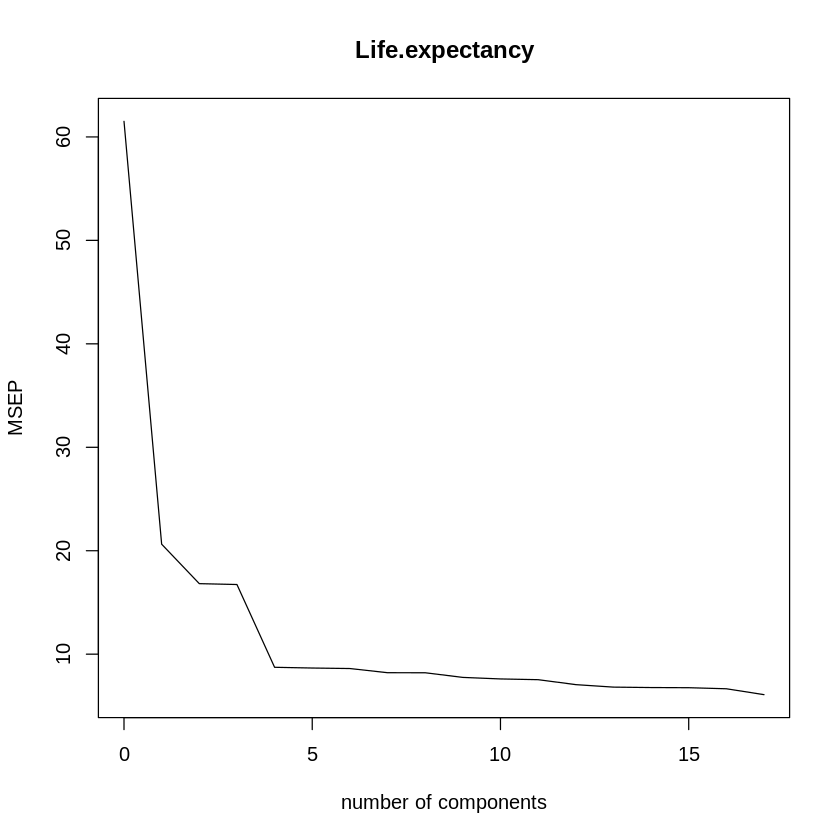

In [ ]:
pcr.fit = pcr(Life.expectancy~., data=r.train, scale=TRUE, validtaion="CV")
summary(pcr.fit)
validationplot(pcr.fit, val.type = "MSEP")

In [ ]:
pcr.pred = predict(pcr.fit, r.test, ncomp=13)
mean((pcr.pred - r.test$Life.expectancy)^2)

[1] 7.809942

# **PLS**

Warning message in FUN(X[[i]], ...):
“Scaling with (near) zero standard deviation”
Warning message in FUN(X[[i]], ...):
“Scaling with (near) zero standard deviation”
Warning message in FUN(X[[i]], ...):
“Scaling with (near) zero standard deviation”
Warning message in FUN(X[[i]], ...):
“Scaling with (near) zero standard deviation”
Warning message in FUN(X[[i]], ...):
“Scaling with (near) zero standard deviation”
Warning message in FUN(X[[i]], ...):
“Scaling with (near) zero standard deviation”
Warning message in FUN(X[[i]], ...):
“Scaling with (near) zero standard deviation”
Warning message in FUN(X[[i]], ...):
“Scaling with (near) zero standard deviation”
Warning message in FUN(X[[i]], ...):
“Scaling with (near) zero standard deviation”
Warning message in FUN(X[[i]], ...):
“Scaling with (near) zero standard deviation”
Warning message in pls::mvr(Life.expectancy ~ ., data = r.train, scale = TRUE, validation = "CV", :
“Scaling with (near) zero standard deviation”


Data: 	X dimension: 1335 212 
	Y dimension: 1335 1
Fit method: kernelpls
Number of components considered: 212

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           8.708      NaN      NaN      NaN      NaN      NaN      NaN
adjCV        8.708      NaN      NaN      NaN      NaN      NaN      NaN
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV         NaN      NaN      NaN       NaN       NaN       NaN       NaN
adjCV      NaN      NaN      NaN       NaN       NaN       NaN       NaN
       14 comps  15 comps  16 comps  17 comps  18 comps  19 comps  20 comps
CV          NaN       NaN       NaN       NaN       NaN       NaN       NaN
adjCV       NaN       NaN       NaN       NaN       NaN       NaN       NaN
       21 comps  22 comps  23 comps  24 comps  25 comps  26 comps  27 comps
CV          NaN       NaN       NaN       NaN       NaN       NaN       NaN
adjCV      

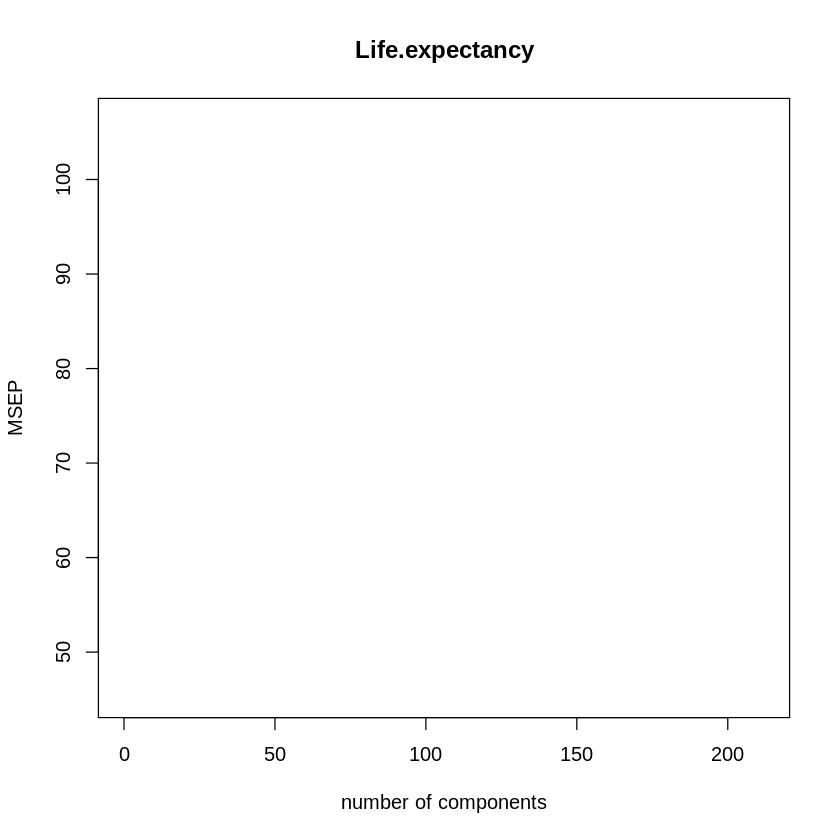

In [494]:
pls.fit = plsr(Life.expectancy~., data=r.train, scale=TRUE, validation="CV")
summary(pls.fit)
validationplot(pls.fit, val.type="MSEP")

In [ ]:
pls.pred = predict(pls.fit, r.test, ncomp=7)
mean((pls.pred - r.test$Life.expectancy)^2)

[1] 6.939505

# Mean

In [ ]:
mean(((mean(r.train$Life.expectancy)) - r.test$Life.expectancy)^2)

[1] 61.77764

# Conclusion

so after applying different kinds of regression, and especially PCR, I came to the conclusion that best model is simple regression. actually different kinds of regression slightly differ in MSE. I chosed simple regression because of both its MSE value and its ease of inferencing.

First, and before applying models, I guessed PCR with 5 or 6 would be the best. because in this high dimensional dataset, all 17 columns could be categorized in 5 or 6 main groups. I thought maybe all economic factors could be summarized into one factor. for example something like this:

```
final.data <- data.frame(seq(1, nrow(data), 1))
final.data$Year <- data$Year
final.data$Life.expectancy <- data$expectancy
final.data$Status <- data$Status
final.data$economy <- data$Total.expenditure * .56828 + data$GDP * .40140 + data$Income.composition.of.resources * 5.32620
final.data$health <- data$Hepatitis.B * .02146 + data$Measles * 0.18613 + data$Diphtheria * 0.35144 + data$BMI * 0.15672 + data$Polio * (-.05556) + data$HIV.AIDS * (-2.27691) + data$thinness.5.9.years * (-.31517)
```
But that didn't happen(15 comps doesn't differ from 17).

In [ ]:
results <- data.frame(seq(1, 17, 1))
results$factor_values <- c(-0.28334,-0.05695,-2.57321,-0.27902,-0.49493,0.02146, 0.18613,0.15672 ,-0.05556,  0.56828 ,0.35144  ,-2.27691,0.40140 , 0.10747,-0.31517,5.32620,0.14876)
results$factor_names <- c("Year","StatusDeveloping","Adult.Mortality","infant.deaths","Alcohol","Hepatitis.B", "Measles",     "BMI",    "Polio","Total.expenditure" ,"Diphtheria","HIV.AIDS","GDP","Population"  ,  "thinness.5.9.years"   ,"Income.composition.of.resources","Schooling")
results[order(abs(results$factor_values)),]

,seq.1..17..1.,factor_values,factor_names
,<dbl>,<dbl>,<chr>
6,6,0.02146,Hepatitis.B
9,9,-0.05556,Polio
2,2,-0.05695,StatusDeveloping
14,14,0.10747,Population
17,17,0.14876,Schooling
8,8,0.15672,BMI
7,7,0.18613,Measles
4,4,-0.27902,infant.deaths
1,1,-0.28334,Year


It's essential to know why lasso and ridge didn't perform better than simple regression. It's main reason is that all columns were "essential" for model. and there wasn't any coefficient near zero. So They couldn't improve our model. 

Other kinds of regression and more complicated model like GAM or splines could be next goal but not in this project!

 1. Does various predicting factors which has been chosen initially really affect the Life expectancy? What are the predicting variables actually affecting the life expectancy? 
*  yes, the low rate of MSE shows that these factors really affect Life expectancy.
  
 2. How does Infant and Adult mortality rates affect life expectancy?
*  yes, the higher the adult mortality value, lower the life expectancy. And as one can see, the highest value after Income.compos... is adult.mortality

 3. Does Life Expectancy has positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc. 
*  life style affect life expectancy alot. and as expected, alcohole can reduce life expectancy.
 
 4. What is the impact of schooling on the lifespan of humans? 
*  as we saw schooling is a number between 0 to 20, and after standardization one can approximately say, every point can lead to 1 to 3 year of life expectancy.
 
 5. Does Life Expectancy have positive or negative relationship with drinking alcohol?
*  life style affect life expectancy alot. and as expected, alcohole can reduce life expectancy.
 
 6. Do densely populated countries tend to have lower life expectancy? 
*  there is approximately no realtionship between population and life expectancy. So it's better to say we can't answer with this data or the answer is no they're independant!

 7. What is the impact of Immunization coverage on life Expectancy?
*  with polio and measles values I came to the conclsion that it has a possitive effect. cause it can lower rates related to these two cols.



# **CLASSIFICATION**


1. Title: Pima Indians Diabetes Database

2. Sources:
   (a) Original owners: National Institute of Diabetes and Digestive and
                        Kidney Diseases
   (b) Donor of database: Vincent Sigillito (vgs@aplcen.apl.jhu.edu)
                          Research Center, RMI Group Leader
                          Applied Physics Laboratory
                          The Johns Hopkins University
                          Johns Hopkins Road
                          Laurel, MD 20707
                          (301) 953-6231
   (c) Date received: 9 May 1990

3. Past Usage:
    1. Smith,~J.~W., Everhart,~J.~E., Dickson,~W.~C., Knowler,~W.~C., \&
       Johannes,~R.~S. (1988). Using the ADAP learning algorithm to forecast
       the onset of diabetes mellitus.  In {\it Proceedings of the Symposium
       on Computer Applications and Medical Care} (pp. 261--265).  IEEE
       Computer Society Press.

       The diagnostic, binary-valued variable investigated is whether the
       patient shows signs of diabetes according to World Health Organization
       criteria (i.e., if the 2 hour post-load plasma glucose was at least 
       200 mg/dl at any survey  examination or if found during routine medical
       care).   The population lives near Phoenix, Arizona, USA.

       Results: Their ADAP algorithm makes a real-valued prediction between
       0 and 1.  This was transformed into a binary decision using a cutoff of 
       0.448.  Using 576 training instances, the sensitivity and specificity
       of their algorithm was 76% on the remaining 192 instances.

4. Relevant Information:
      Several constraints were placed on the selection of these instances from
      a larger database.  In particular, all patients here are females at
      least 21 years old of Pima Indian heritage.  ADAP is an adaptive learning
      routine that generates and executes digital analogs of perceptron-like
      devices.  It is a unique algorithm; see the paper for details.

5. Number of Instances: 768

6. Number of Attributes: 8 plus class 

7. For Each Attribute: (all numeric-valued)
   1. Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)
   9. Class variable (0 or 1)

8. Missing Attribute Values: Yes

9. Class Distribution: (class value 1 is interpreted as "tested positive for
   diabetes")

   Class Value  Number of instances
   0            500
   1            268


In [ ]:
cla_data = read.csv("/content/diabate.csv")
summary(cla_data)
preproc1 <- preProcess(cla_data[,c(1:8)], method=c("center", "scale"))
cla_data <- predict(preproc1, cla_data[,c(1:9)])
corr_cl <- cor(cla_data)

    pregnant          plasma        diastolic         triceps     
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    insulin           bmi             dpf              age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780   Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437   1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725   Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719   Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262   3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200   Max.   :81.00  
    diabetes    
 Min.   :0.000  
 1st Qu.:0.000  
 Median :0.000  
 

Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


[1] 573
[1] 573
[1] 9


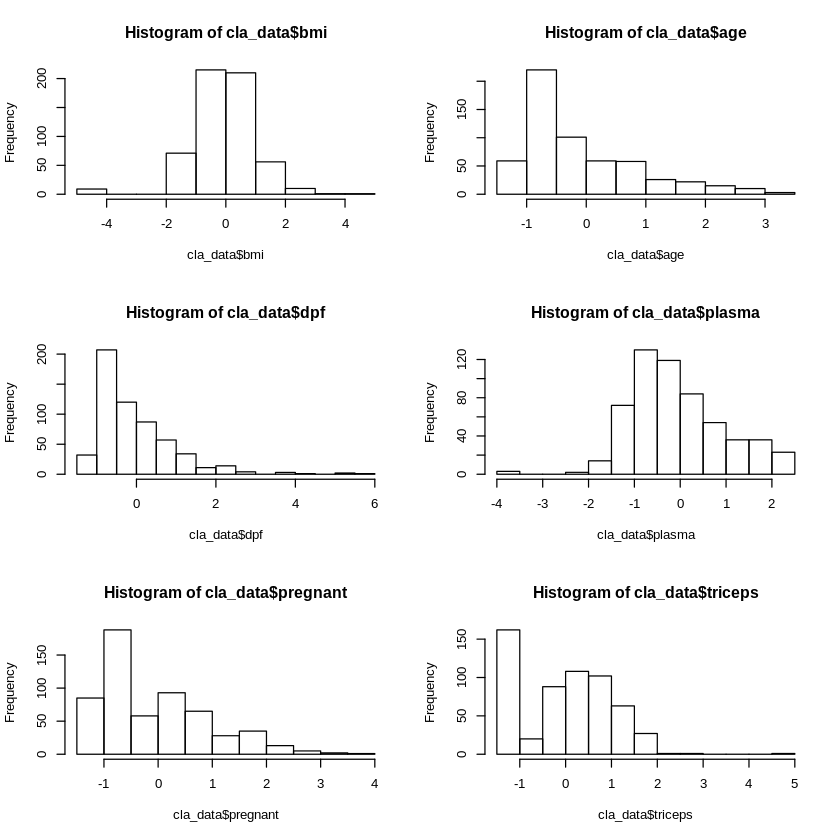

In [ ]:
cla.detector <- glm(diabetes~., cla_data, family=binomial)
HighLeverage1 <- abs(cooks.distance(cla.detector)) > (4/nrow(cla_data))
LargeResiduals1 <- abs(rstudent(cla.detector)) > 3
print(nrow(cla_data))
cla_data <- cla_data[!HighLeverage1 & !LargeResiduals1,]
print(nrow(cla_data))
print(ncol(cla_data))
par(mfrow = c(3,2))
hist(cla_data$bmi)
hist(cla_data$age)
hist(cla_data$dpf)
hist(cla_data$plasma)
hist(cla_data$pregnant)
hist(cla_data$triceps)



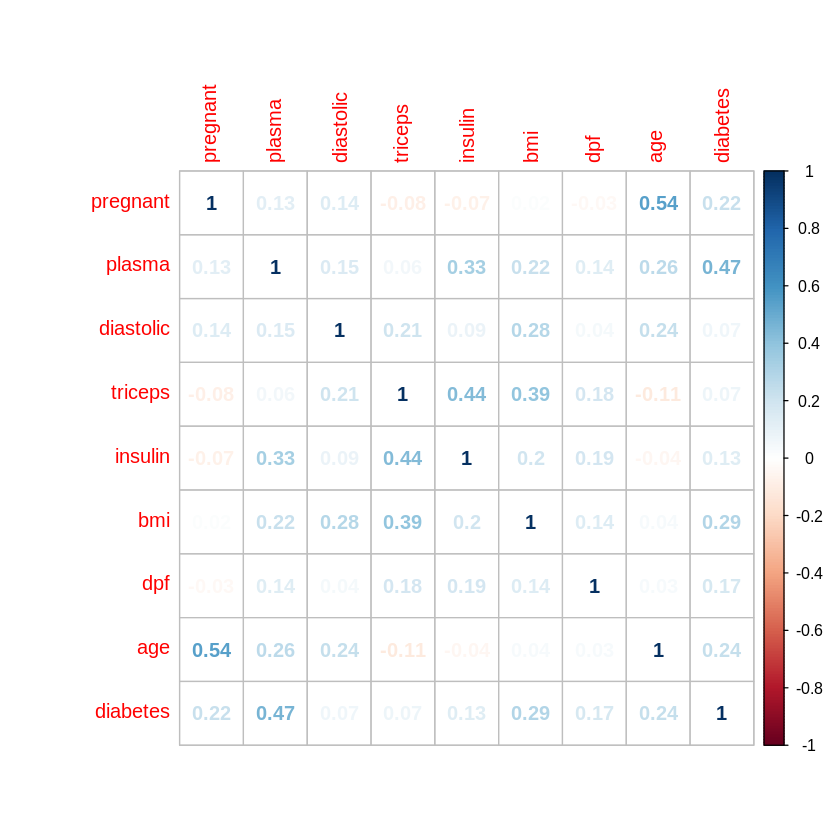

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



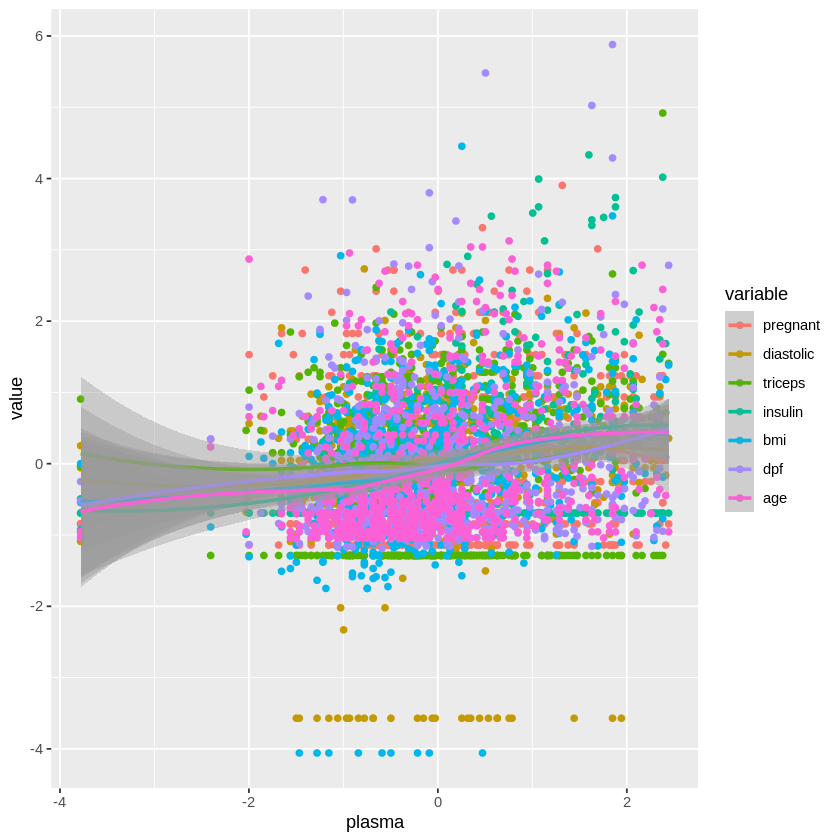

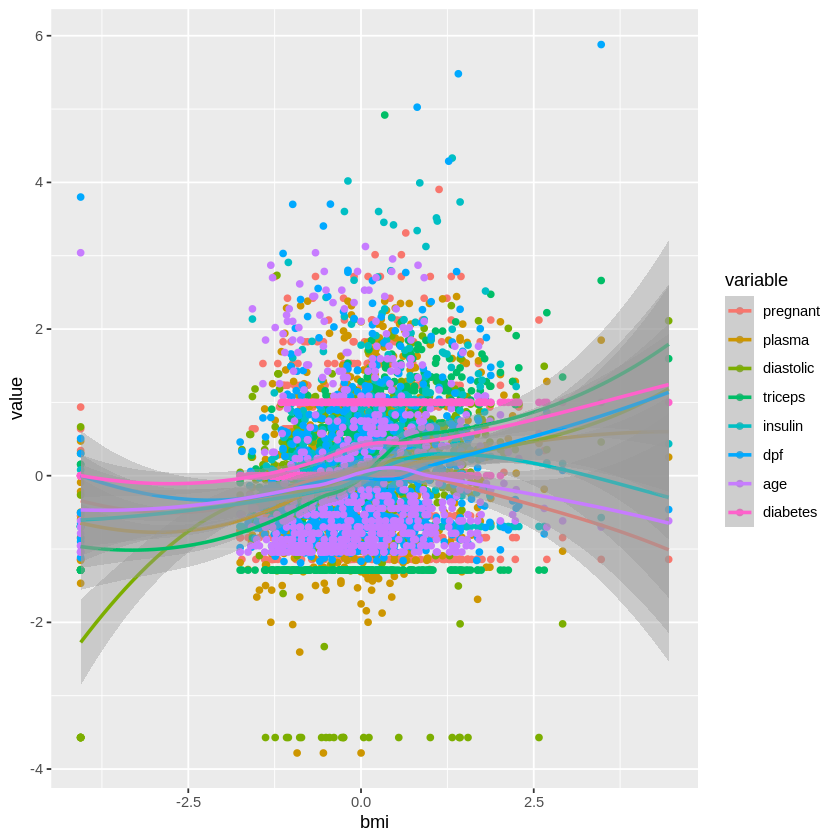

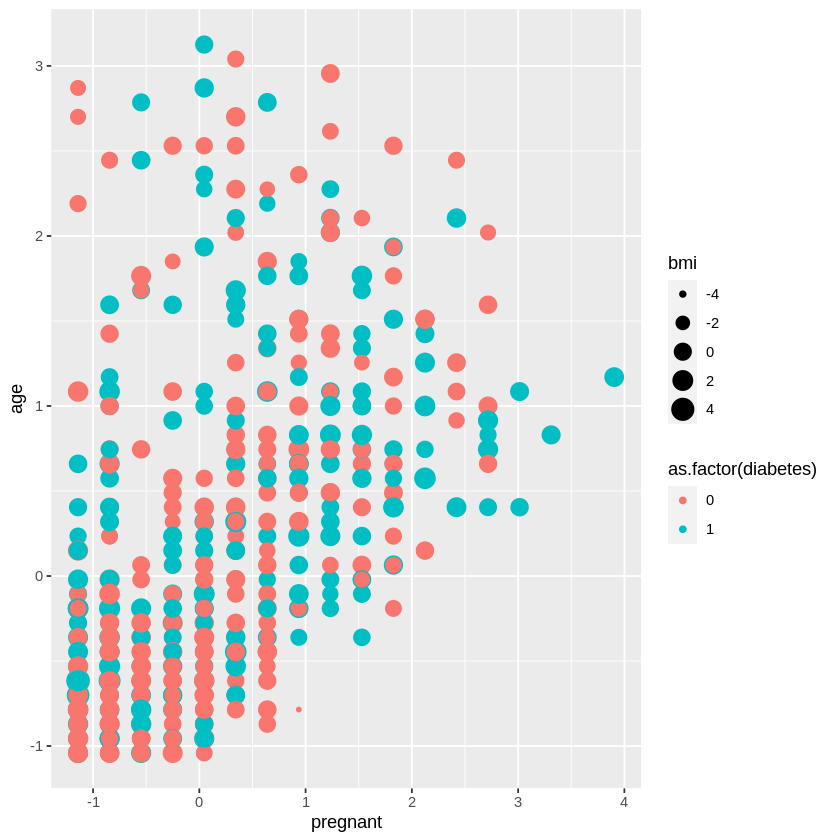

In [ ]:
data.v <- melt(cla_data[, c(1:8)], id.vars="plasma")
ggplot(data.v, aes(plasma, value, col=variable)) + 
  geom_point() + 
  stat_smooth() 

data.v <- melt(cla_data, id.vars="bmi")
ggplot(data.v, aes(bmi, value, col=variable)) + 
  geom_point() + 
  stat_smooth() 

ggplot(cla_data, aes(pregnant, age, col=as.factor(diabetes))) + geom_point(aes(size=bmi))

Data: 	X dimension: 723 8 
	Y dimension: 723 1
Fit method: svdpc
Number of components considered: 8
TRAINING: % variance explained
                      1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
X                       26.47    48.68    61.26    72.34    81.84    90.28
as.numeric(diabetes)    21.43    24.44    30.50    30.73    35.84    41.26
                      7 comps  8 comps
X                       95.34   100.00
as.numeric(diabetes)    41.29    42.25


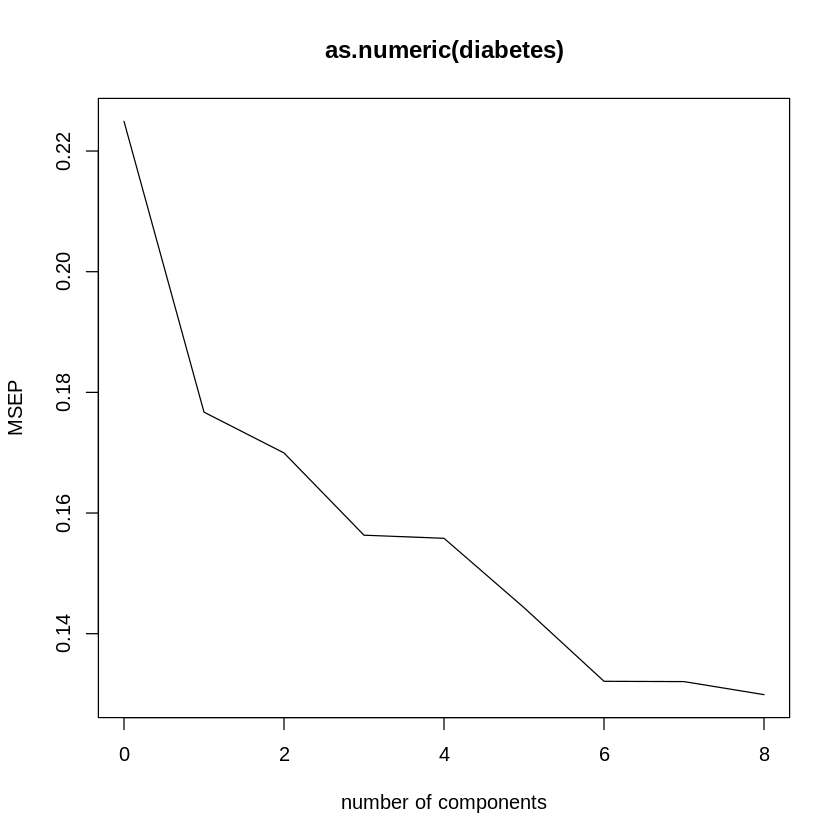

In [ ]:
pcr.fit1 = pcr(as.numeric(diabetes)~., data=cla_data, scale=TRUE, validtaion="CV")
summary(pcr.fit1)
validationplot(pcr.fit1, val.type = "MSEP")

Again we cant use PCR and all 8 factors would be needed.

In [ ]:
index <- sample(1:nrow(cla_data), size = trunc(.75 * nrow(cla_data)))
c.train <- cla_data %>%
  filter(row_number() %in% index)
c.test <- cla_data %>%
  filter(!row_number() %in% index)

in the following cells, I implemted four different kinds of classification. And for all of them except logistic, we've got two different ones, doing different.

# logistic

In [ ]:
install.packages("ROCR")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(ROCR)

In [ ]:
glm.fit = glm(diabetes~., data=c.train, family=binomial)
summary(glm.fit)


Call:
glm(formula = diabetes ~ ., family = binomial, data = c.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2259  -0.5951  -0.2697   0.4788   2.3956  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.06634    0.13497  -7.900 2.78e-15 ***
pregnant     0.54157    0.15870   3.413 0.000643 ***
plasma       1.88096    0.20162   9.329  < 2e-16 ***
diastolic   -0.37062    0.16448  -2.253 0.024242 *  
triceps      0.04346    0.15607   0.278 0.780653    
insulin     -0.28506    0.16284  -1.751 0.080011 .  
bmi          1.06951    0.17563   6.090 1.13e-09 ***
dpf          0.52090    0.14327   3.636 0.000277 ***
age          0.08743    0.15832   0.552 0.580786    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 695.83  on 541  degrees of freedom
Residual deviance: 407.96  on 533  degrees of freedom
AIC: 425.96

Number of Fisher Scoring

In [ ]:
glm.probs = predict(glm.fit, c.test, type="response")
nrow(c.test)
glm.pred = rep(1, nrow(c.test))
glm.pred[glm.probs < .4] = 0.0 # .4 was selected because of mean(cla_data$diabetes) is approximately .4
table(glm.pred, c.test$diabetes)
mean(glm.pred==c.test$diabetes) 

[1] 181

        
glm.pred   0   1
       0 103  20
       1  16  42

[1] 0.801105

In [ ]:
c.train.c <- c.train
c.train.c$diabetes <- as.factor(c.train.c$diabetes)
ctrl <- trainControl(method="LOOCV") #,classProbs=TRUE,summaryFunction = twoClassSummary)
lrgs <- train(diabetes ~ .,
               data = c.train.c,
               trControl = ctrl,
               method = "glm",
               family=binomial())
lrgs
summary(lrgs)

Generalized Linear Model 

542 samples
  8 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 541, 541, 541, 541, 541, 541, ... 
Resampling results:

  Accuracy   Kappa  
  0.8062731  0.55466



Call:
NULL

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2259  -0.5951  -0.2697   0.4788   2.3956  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.06634    0.13497  -7.900 2.78e-15 ***
pregnant     0.54157    0.15870   3.413 0.000643 ***
plasma       1.88096    0.20162   9.329  < 2e-16 ***
diastolic   -0.37062    0.16448  -2.253 0.024242 *  
triceps      0.04346    0.15607   0.278 0.780653    
insulin     -0.28506    0.16284  -1.751 0.080011 .  
bmi          1.06951    0.17563   6.090 1.13e-09 ***
dpf          0.52090    0.14327   3.636 0.000277 ***
age          0.08743    0.15832   0.552 0.580786    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 695.83  on 541  degrees of freedom
Residual deviance: 407.96  on 533  degrees of freedom
AIC: 425.96

Number of Fisher Scoring iterations: 6


In [ ]:
lrgs.pred <- predict(lrgs, newdata=c.test)
table(lrgs.pred, c.test$diabetes)
mean(lrgs.pred==c.test$diabetes)

         
lrgs.pred   0   1
        0 109  21
        1  10  41

[1] 0.8287293

So with LOOCV we got to a very good threshhold so that we reached the accuracy of .83 instead of first .4 threshhold.

# LDA

In [ ]:
library(MASS)
install.packages("e1071")
lda.fit = lda(diabetes~., data=c.train)
lda.fit

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Call:
lda(diabetes ~ ., data = c.train)

Prior probabilities of groups:
        0         1 
0.6586716 0.3413284 

Group means:
    pregnant     plasma   diastolic    triceps    insulin        bmi        dpf
0 -0.2009109 -0.3750888 -0.01992068 -0.0422332 -0.1136406 -0.2289633 -0.1765140
1  0.2801945  0.7512360  0.10514011  0.1832348  0.2451249  0.4945757  0.2690867
         age
0 -0.2312775
1  0.2484030

Coefficients of linear discriminants:
                  LD1
pregnant   0.30809037
plasma     1.06529633
diastolic -0.21851263
triceps    0.01233604
insulin   -0.09921046
bmi        0.50052056
dpf        0.24387397
age        0.04645378

In [ ]:
lda.pred = predict(lda.fit, c.test)
lda.class = lda.pred$class
table(lda.class, c.test$diabetes)
mean(lda.class==c.test$diabetes) 

         
lda.class   0   1
        0 110  22
        1   9  40

[1] 0.8287293

In [ ]:
c.train.c <- c.train
c.train.c$diabetes <- as.factor(c.train.c$diabetes)
ctrl <- trainControl(method="LOOCV") #,classProbs=TRUE,summaryFunction = twoClassSummary)
lda1 <- train(diabetes ~ ., data = c.train.c, method = "lda", trControl = ctrl, preProcess = c("center","scale"), tuneLength = 20)
lda1

Linear Discriminant Analysis 

542 samples
  8 predictor
  2 classes: '0', '1' 

Pre-processing: centered (8), scaled (8) 
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 541, 541, 541, 541, 541, 541, ... 
Resampling results:

  Accuracy   Kappa    
  0.8118081  0.5584698


         
lda1.pred   0   1
        0 110  22
        1   9  40

[1] 0.8287293

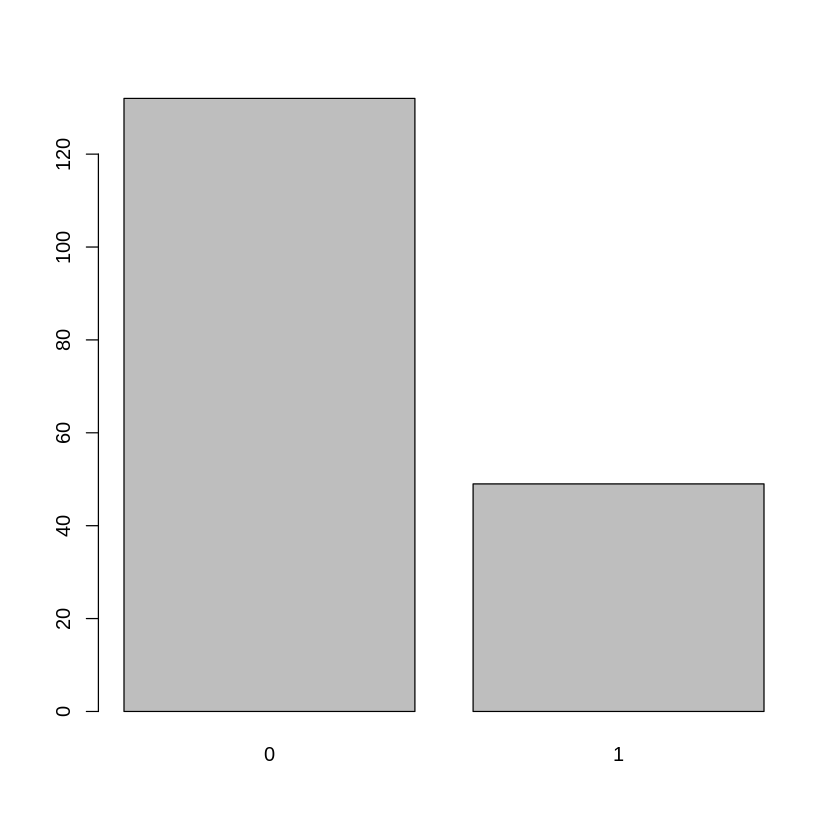

In [ ]:
lda1.pred <- predict(lda1, newdata = c.test)
table(lda1.pred, c.test$diabetes)
mean(lda1.pred==c.test$diabetes)

# QDA

In [ ]:
qda.fit = qda(diabetes~., data=c.train)
qda.fit

Call:
qda(diabetes ~ ., data = c.train)

Prior probabilities of groups:
        0         1 
0.6586716 0.3413284 

Group means:
    pregnant     plasma   diastolic    triceps    insulin        bmi        dpf
0 -0.2009109 -0.3750888 -0.01992068 -0.0422332 -0.1136406 -0.2289633 -0.1765140
1  0.2801945  0.7512360  0.10514011  0.1832348  0.2451249  0.4945757  0.2690867
         age
0 -0.2312775
1  0.2484030

In [ ]:
qda.class = predict(qda.fit, c.test)$class
table(qda.class, c.test$diabetes)
mean(qda.class==c.test$diabetes)

         
qda.class   0   1
        0 104  23
        1  15  39

[1] 0.7900552

In [ ]:
c.train.c <- c.train
c.train.c$diabetes <- as.factor(c.train.c$diabetes)
ctrl <- trainControl(method="LOOCV") #,classProbs=TRUE,summaryFunction = twoClassSummary)
qda1 <- train(diabetes ~ ., data = c.train.c, method = "qda", trControl = ctrl, preProcess = c("center","scale"), tuneLength = 20)
qda1

Quadratic Discriminant Analysis 

542 samples
  8 predictor
  2 classes: '0', '1' 

Pre-processing: centered (8), scaled (8) 
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 541, 541, 541, 541, 541, 541, ... 
Resampling results:

  Accuracy   Kappa    
  0.7712177  0.4775904


In [ ]:
qda1.pred <- predict(qda1, newdata = c.test)
table(qda1.pred, c.test$diabetes)
mean(qda1.pred==c.test$diabetes)

         
qda1.pred   0   1
        0 104  23
        1  15  39

[1] 0.7900552

# KNN

In [ ]:
library(class)
c.train$diabetes <- as.factor(c.train$diabetes)
knn.pred = knn(c.train, c.test, c.train$diabetes, k=5)
table(knn.pred, c.test$diabetes)
mean(knn.pred==c.test$diabetes)

        
knn.pred   0   1
       0 116   4
       1   3  58

[1] 0.961326

As above models show, knn is far better than all of them with a random number 5 I set it.

Now to get the best k we have...

k-Nearest Neighbors 

542 samples
  8 predictor
  2 classes: '0', '1' 

Pre-processing: centered (8), scaled (8) 
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 541, 541, 541, 541, 541, 541, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   5  0.7564576  0.4317304
   7  0.7564576  0.4254509
   9  0.7638376  0.4413181
  11  0.7785978  0.4747808
  13  0.7712177  0.4527125
  15  0.7749077  0.4554379
  17  0.7822878  0.4732924
  19  0.7841328  0.4770152
  21  0.7841328  0.4755273
  23  0.7749077  0.4507700
  25  0.7804428  0.4665619
  27  0.7859779  0.4807486
  29  0.7822878  0.4687775
  31  0.7785978  0.4597737
  33  0.7767528  0.4529271
  35  0.7804428  0.4588640
  37  0.7822878  0.4626359
  39  0.7749077  0.4428097
  41  0.7822878  0.4595115
  43  0.7749077  0.4379218

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 27.

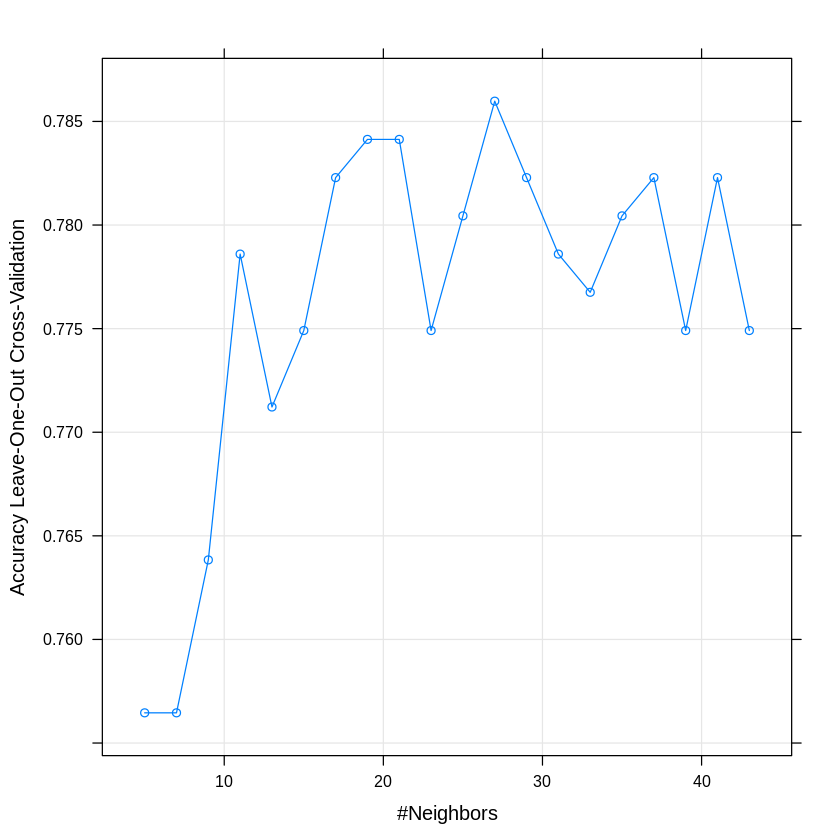

In [ ]:
library(e1071)
c.train.c <- c.train
c.train.c$diabetes <- as.factor(c.train.c$diabetes)
ctrl <- trainControl(method="LOOCV") #,classProbs=TRUE,summaryFunction = twoClassSummary)
knnFit <- train(diabetes ~ ., data = c.train.c, method = "knn", trControl = ctrl, preProcess = c("center","scale"), tuneLength = 20)
knnFit
plot(knnFit)

In [ ]:
c.test.c <- c.test
c.test.c$diabetes <- as.factor(c.test.c$diabetes)
knnPredict <- predict(knnFit,newdata = c.test.c )
#Get the confusion matrix to see accuracy value and other parameter values
confusionMatrix(knnPredict, c.test.c$diabetes )

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 114  32
         1   5  30
                                          
               Accuracy : 0.7956          
                 95% CI : (0.7294, 0.8518)
    No Information Rate : 0.6575          
    P-Value [Acc > NIR] : 3.277e-05       
                                          
                  Kappa : 0.4933          
                                          
 Mcnemar's Test P-Value : 1.917e-05       
                                          
            Sensitivity : 0.9580          
            Specificity : 0.4839          
         Pos Pred Value : 0.7808          
         Neg Pred Value : 0.8571          
             Prevalence : 0.6575          
         Detection Rate : 0.6298          
   Detection Prevalence : 0.8066          
      Balanced Accuracy : 0.7209          
                                          
       'Positive' Class : 0               
                              

In [ ]:
mean(knnPredict == c.test.c$diabetes)
knn.pred = knn(c.train, c.test, c.train$diabetes, k=27)
table(knn.pred, c.test$diabetes)
mean(knn.pred==c.test$diabetes)

[1] 0.7955801

        
knn.pred   0   1
       0 119  18
       1   0  44

[1] 0.9005525

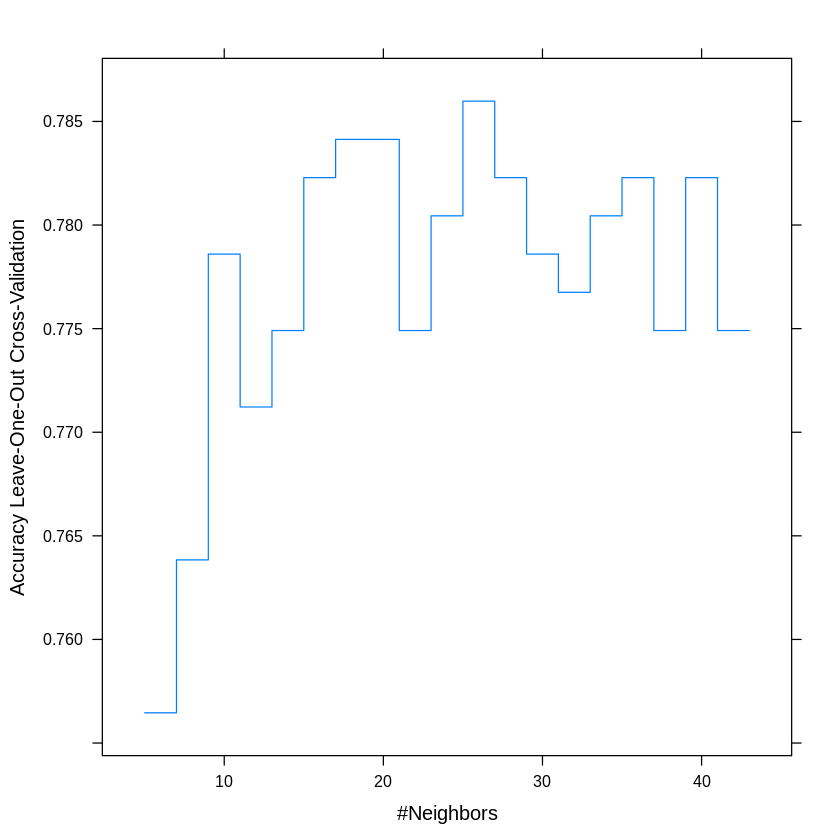

In [ ]:
plot(knnFit, print.thres = 0.5, type="S")

# New Section

Warning message in `==.default`(lrgs.pred, c.train$diabetes):
“longer object length is not a multiple of shorter object length”
Warning message in is.na(e1) | is.na(e2):
“longer object length is not a multiple of shorter object length”
Warning message in `==.default`(lda1.pred, c.train$diabetes):
“longer object length is not a multiple of shorter object length”
Warning message in is.na(e1) | is.na(e2):
“longer object length is not a multiple of shorter object length”
Warning message in `==.default`(qda1.pred, c.train$diabetes):
“longer object length is not a multiple of shorter object length”
Warning message in is.na(e1) | is.na(e2):
“longer object length is not a multiple of shorter object length”
Warning message in `==.default`(knn.pred, c.train$diabetes):
“longer object length is not a multiple of shorter object length”
Warning message in is.na(e1) | is.na(e2):
“longer object length is not a multiple of shorter object length”


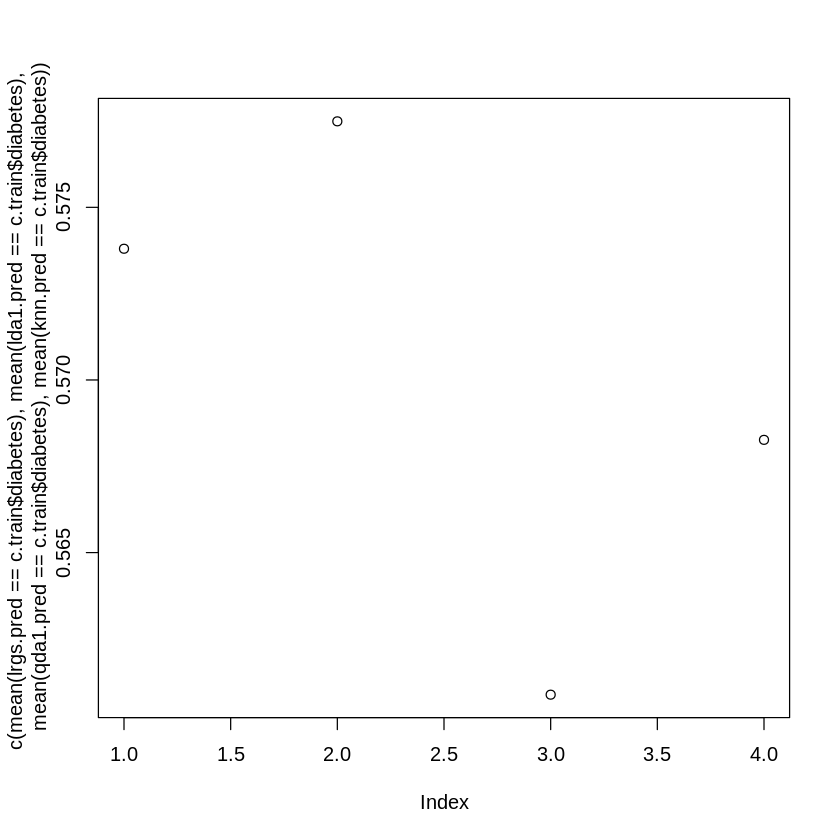

In [ ]:
plot(c(mean(lrgs.pred==c.train$diabetes), mean(lda1.pred==c.train$diabetes), mean(qda1.pred==c.train$diabetes), mean(knn.pred==c.train$diabetes)))

# Random

In [ ]:
perdiction <- runif(nrow(c.test))
perdiction[perdiction >= .5] = 1
perdiction[perdiction < .5] = 0
table(perdiction, c.test$diabetes)
mean(perdiction==c.test$diabetes)

          
perdiction  0  1
         0 68 33
         1 51 29

[1] 0.5359116

# Conclusion

as shown above, I don't know why this happend. knn with knn function give me one accuracy and another knn from train function another accuracy. So as we had knn from CLASS package in the book I use that one as the refrence. and we get to the optimal model a very low accuracy and fn and fp. 

Otherwise one can choose lda.

the reason for knn is that the data set is small, so it can perform very well. also theses parameters value are very close to each other, so in 9 dimension, we can have a very good model.

LDA is better than logistic, because due to graphs we can assume that these come from a normal distrubution.

"LDA is less flexible than QDA because we have to estimate less parameters. This can be good when we have only a few observations in our training data set so we lower the variance." So in this 8 parametric project with only 600 data, we can't expect QDA to have a better perfomance.



Here we should talk a little about why LDA performed better that qda. 